<a href="https://colab.research.google.com/github/baekka1/Crop-Yield-Prediction/blob/main/Analyze_spatial_weather_heterogeneity_by_clustering_climate_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload file
df = pd.read_csv("all_feature_data_avg.csv")

# Check data
df.head()

,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627


# Apply Scalar to Data


In [3]:
from sklearn.preprocessing import StandardScaler

weather_data = df[['tmmx', 'rmax', 'vs', 'sph', 'srad', 'vpd', 'rmin', 'pr', 'tmmn', 'th', 'year']]

scaler = StandardScaler()
weather_scaled = pd.DataFrame(scaler.fit_transform(weather_data), columns=weather_data.columns)

display(weather_scaled.head())

,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th,year
0,0.413096,-0.187249,-0.006969,-0.028098,1.287027,0.021913,-0.700090,-0.109649,0.239040,-0.199320,-1.613347
1,0.369648,-0.416426,-0.061761,-0.028126,1.229632,0.020473,-0.677168,-0.092178,0.239749,0.331956,-1.613347
2,0.463333,0.089933,-0.062176,-0.028026,1.705766,0.017570,-0.551007,-0.117170,0.310740,-0.406528,-1.613347
3,0.451208,-0.184246,-0.025484,-0.028074,1.598136,0.022605,-0.554425,-0.058436,0.267094,0.330857,-1.613347
4,0.482559,-0.099676,-0.068154,-0.028015,1.832410,0.022276,-0.486518,-0.083722,0.389087,-0.492369,-1.613347


# Find Optimal Number of Clusters

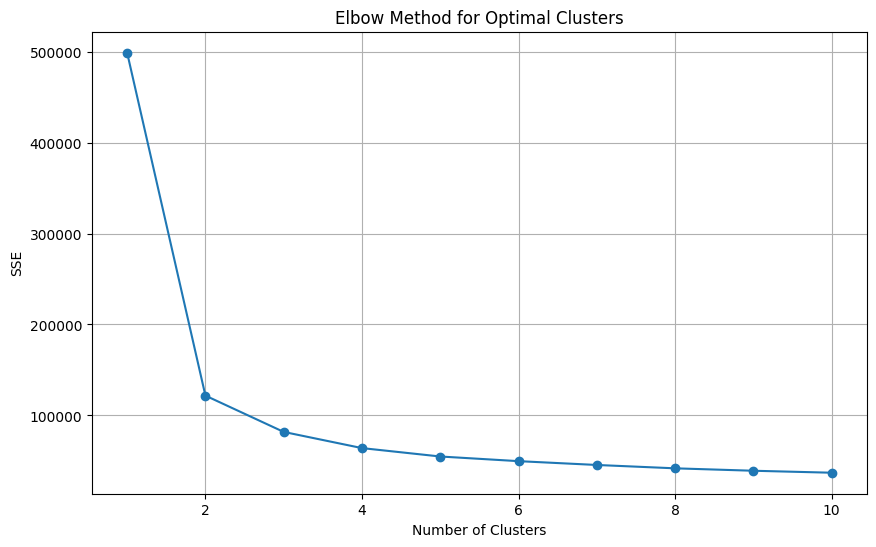

In [4]:
from sklearn.cluster import KMeans

sse = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init explicitly
    kmeans.fit(weather_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

## Perform k-means clustering




In [5]:
from sklearn.cluster import KMeans

# Assuming 10 is the optimal number of clusters based on the elbow method plot
n_clusters = 10

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_model.fit(weather_scaled)

KMeans(n_clusters=10, n_init=10, random_state=42)

## Assign clusters to counties




In [6]:
df['climate_region'] = kmeans_model.labels_
display(df.head())

,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th,climate_region
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998,4
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968,5
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970,4
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030,4
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627,4


## Analyze regional yield sensitivity



In [7]:
yield_correlations_by_region = {}

for region, region_df in df.groupby('climate_region'):
    correlation_matrix = region_df.corr()
    yield_correlations = correlation_matrix['yield'].drop('yield')
    yield_correlations_by_region[region] = yield_correlations

for region, correlations in yield_correlations_by_region.items():
    print(f"Climate Region {region}:")
    display(correlations.sort_values(ascending=False))

Climate Region 0:


,yield
year,0.521462
Unnamed: 0,0.510961
index,0.510809
vs,0.168051
pr,0.113630
rmin,0.072165
th,0.029021
rmax,-0.096305
id2,-0.206953
sph,-0.278148


Climate Region 1:


,yield
year,0.355768
index,0.329277
Unnamed: 0,0.326757
vs,0.230460
rmin,0.057309
pr,0.029361
th,0.004391
rmax,-0.032129
tmmn,-0.106639
sph,-0.164039


Climate Region 2:


,yield
year,0.573306
index,0.573306
Unnamed: 0,0.570298
rmin,0.433267
sph,0.413832
tmmn,0.324705
vs,0.262653
pr,0.240402
th,0.205495
srad,0.161475


Climate Region 3:


,yield
year,0.421689
index,0.402006
Unnamed: 0,0.399102
rmin,0.301034
pr,0.258032
vs,0.190422
rmax,0.048785
sph,0.015414
tmmn,0.000228
th,-0.194913


Climate Region 4:


,yield
year,0.327082
Unnamed: 0,0.326923
index,0.324449
vs,0.279337
srad,0.217746
rmax,0.012845
vpd,0.000187
id2,-0.058271
year_index,-0.061174
pr,-0.180748


Climate Region 5:


,yield
pr,0.306067
rmin,0.300466
tmmn,0.300088
sph,0.288477
rmax,0.163587
tmmx,0.124401
year,0.067772
th,0.050192
Unnamed: 0,0.046623
index,0.045658


Climate Region 6:


,yield
year,0.241310
index,0.217050
Unnamed: 0,0.215139
rmin,0.183040
vs,0.179644
pr,0.019355
rmax,-0.046357
tmmn,-0.144813
th,-0.146556
sph,-0.189903


Climate Region 7:


,yield
pr,0.424819
tmmn,0.374508
year,0.338524
Unnamed: 0,0.320575
index,0.318783
sph,0.272261
rmin,0.258768
tmmx,0.158814
vs,-0.005538
vpd,-0.083345


Climate Region 8:


,yield
tmmn,0.468288
sph,0.394966
tmmx,0.393923
rmin,0.232978
year,0.175954
index,0.162884
Unnamed: 0,0.162266
vpd,0.157804
pr,0.155965
srad,0.130422


Climate Region 9:


,yield
vs,0.219962
rmax,0.157831
id2,0.147769
srad,0.143327
year_index,0.133550
th,-0.026330
index,-0.058530
Unnamed: 0,-0.063188
year,-0.065526
pr,-0.075032


## Identify sensitive regions



## Visualize climate regions



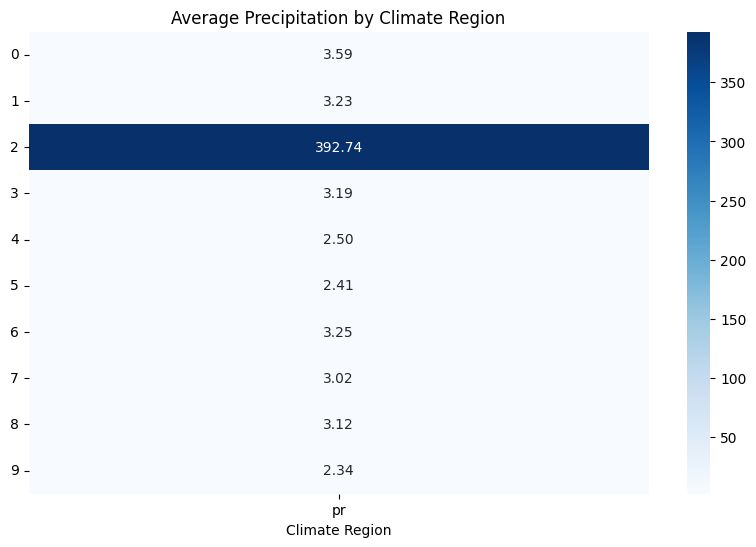

In [9]:
import seaborn as sns
# Calculate the average precipitation for each climate region
avg_pr_by_region = df.groupby('climate_region')['pr'].mean().reset_index()

# Reshape the data for the heatmap (optional, but can be useful for clarity)
# In this case, since we only have one variable (precipitation), a simple bar plot might also be effective,
# but a heatmap can still show the values clearly.
# For a heatmap to be meaningful, you usually need a matrix of values.
# Let's create a simple heatmap showing the average precipitation value per region.
# We can treat climate region as one axis and 'average precipitation' as the value.

plt.figure(figsize=(10, 6))
sns.heatmap(avg_pr_by_region.set_index('climate_region'), annot=True, cmap='Blues', fmt=".2f")
plt.title('Average Precipitation by Climate Region')
plt.xlabel('Climate Region')
plt.ylabel('') # No y-label needed as climate region is on the index
plt.yticks(rotation=0)
plt.savefig('precipitation_by_cluster.png')
plt.show()


Columns in the shapefile geodataframe:
Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2', 'TYPE_2',
       'ENGTYPE_2', 'NL_NAME_2', 'VARNAME_2', 'Area', 'geometry'],
      dtype='object')


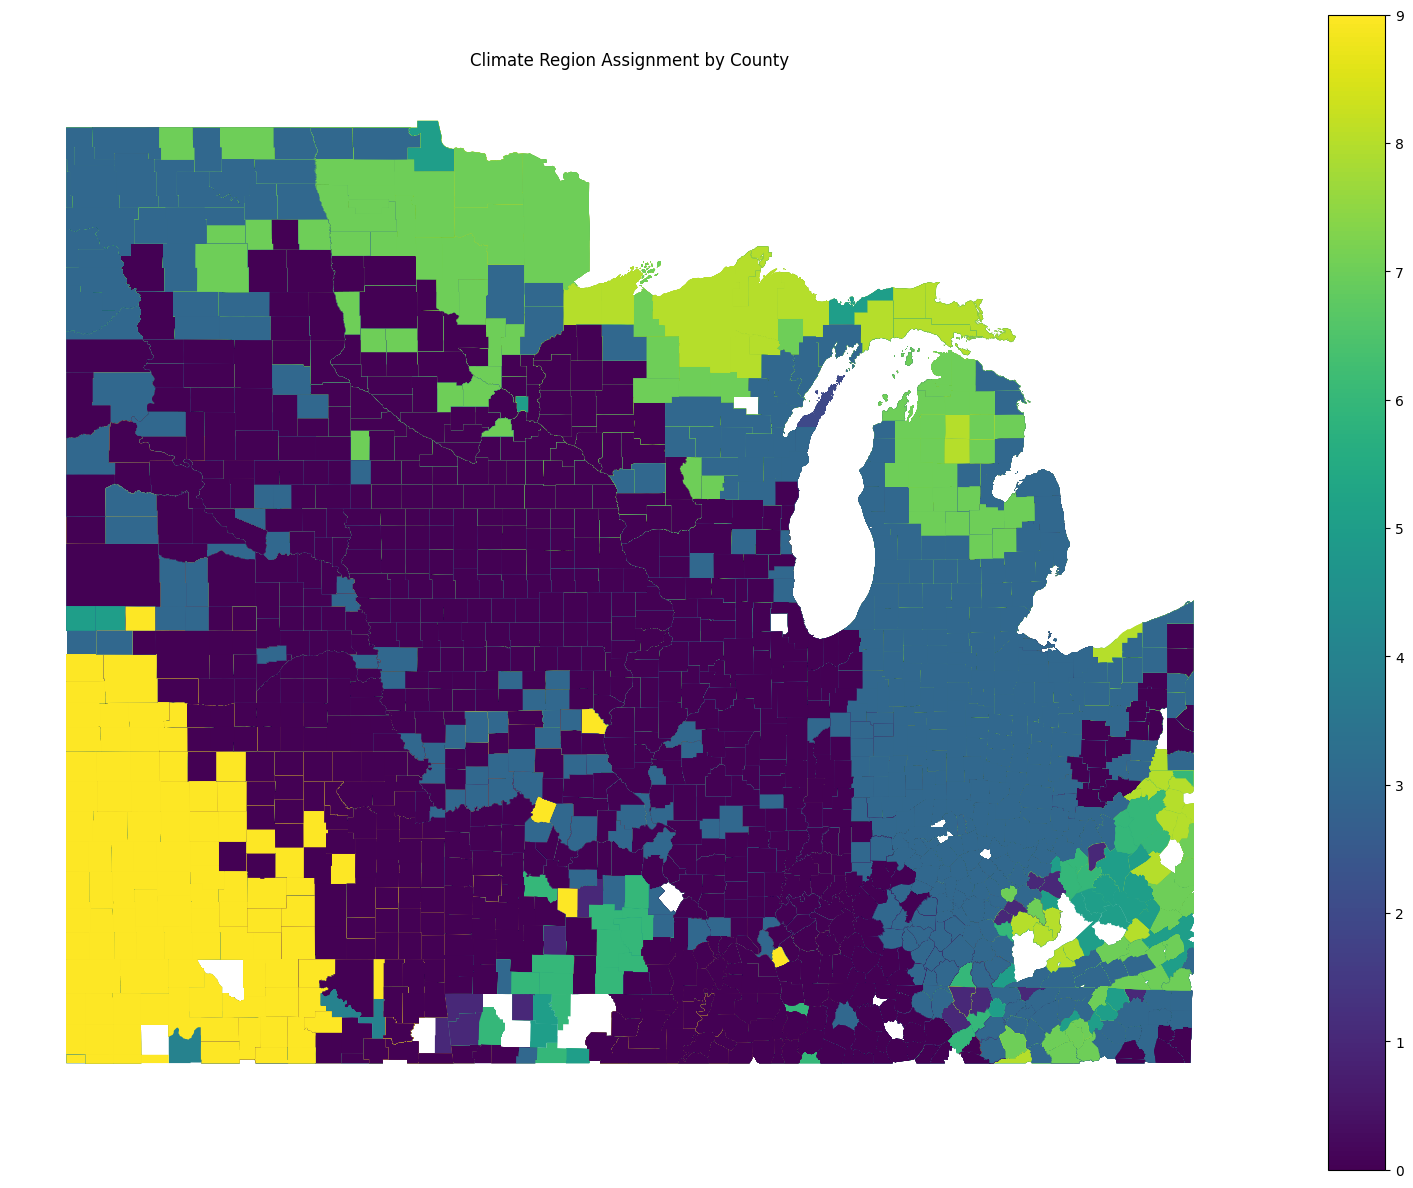

In [13]:
import geopandas as gpd
import zipfile
import os

# Unzip the shapefile
with zipfile.ZipFile('CornBeltShapefiles.zip', 'r') as zip_ref:
    zip_ref.extractall('CornBeltShapefiles')

# Find the .shp file in the unzipped directory
shp_file = None
for root, dirs, files in os.walk('CornBeltShapefiles'):
    for file in files:
        if file.endswith('.shp'):
            shp_file = os.path.join(root, file)
            break
    if shp_file:
        break

if shp_file:
    # Load the shapefile
    counties_gdf = gpd.read_file(shp_file)

    # Inspect columns of the shapefile's geodataframe to find the correct join key
    print("Columns in the shapefile geodataframe:")
    print(counties_gdf.columns)

    # Merge the geodataframe with the climate region data
    # Assuming 'id2' in the dataframe corresponds to a column in the shapefile for merging
    # Replace 'COUNTYFP' with the actual column name from the shapefile that represents the county ID
    # You might need to manually check the printed columns and update this line
    merged_gdf = counties_gdf.merge(df, left_on='ID_2', right_on='id2') # Assuming 'COUNTYFP' is the county ID in the shapefile

    # Create the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged_gdf.plot(column='climate_region', ax=ax, legend=True, cmap='viridis')
    ax.set_title('Climate Region Assignment by County')
    ax.set_axis_off()
    plt.show()
else:
    print("Shapefile (.shp) not found in the zip archive.")